<a href="https://colab.research.google.com/github/harendradh/GoldpricePrediction/blob/main/GoldPricePrediction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 43.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1


In [ ]:
import pandas as pd
import os

# Assuming the CSV file is named 'gld_price_data.csv' and is located within the '1' directory
file_path = os.path.join(
    '/root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1',
    'gld_price_data.csv'  # Replace with the actual CSV file name
)

# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(file_path)

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
import pandas as pd

# Assuming 'Date' is the column containing dates
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Now calculate the correlation, excluding the 'Date' column
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

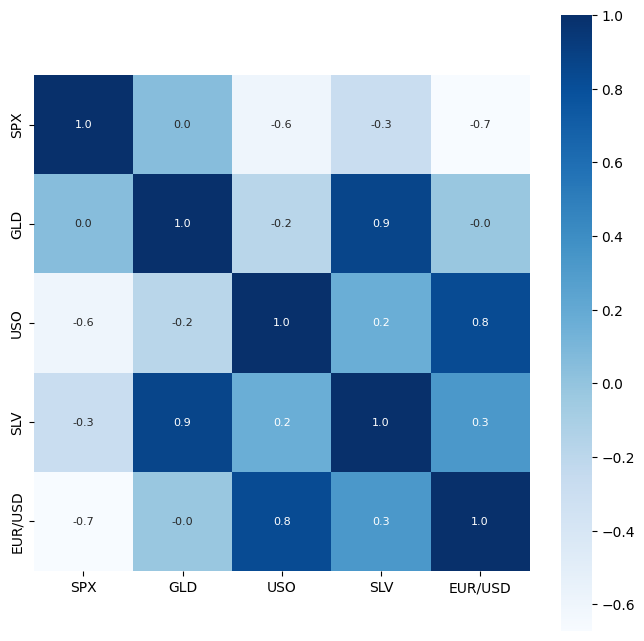

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

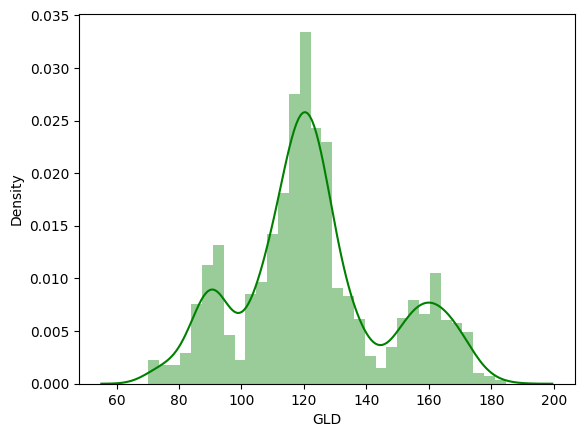

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.59499957  81.85809988 115.67960031 127.64550053 120.57930126
 154.68129714 150.43269891 125.97430053 117.61249864 126.22370026
 116.51970106 172.63440064 141.90439884 168.01669873 115.33120034
 117.62650058 138.00760331 170.08970103 159.37480309 157.92999917
 155.06470009 125.10309988 176.19610011 157.32640335 125.22050037
  93.73479965  77.37650007 120.33760012 119.0800997  167.41690001
  88.01380026 125.27680013  91.2044004  117.63739992 121.16589938
 136.46190099 115.49490123 114.79130084 146.74759963 107.40860122
 104.07300244  87.15369785 126.31870096 117.94090002 154.23929962
 119.63860021 108.33830001 107.90119806  93.16260057 127.18349763
  74.81410024 113.69009935 121.14250024 111.34579954 118.74539863
 121.01379956 159.1832003  166.56680173 147.28409713  86.00429849
  94.24720053  86.92399895  90.5679001  118.91490088 126.39350075
 127.65590021 170.27310003 122.33359916 117.41169916  98.47350028
 168.50010062 143.21099858 132.31970187 121.10580247 120.88699926
 119.62250

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897290319667256


In [ ]:
Y_test = list(Y_test)

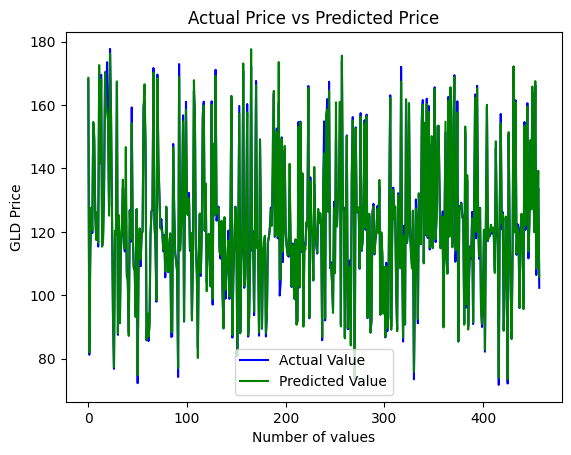

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()